[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW4.ipynb)

# Stat 220 — Homework 4:

**Instructions**
- Answer all questions. Show all work for full credit.
- Use Python (NumPy/Matplotlib/SciPy) to compute values and make plots.
- When a plot is requested, label axes and include a legend.
- You may add cells as needed.

In [28]:

# Feel free to add any imports you want here.
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, binom
from scipy.optimize import minimize

## Data (used in Q1–Q4)
We use this small dataset throughout Questions 1–4:

In [29]:

x = np.array([1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5], dtype=float)
n = len(x)
x


array([1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5])

## Question 1 — Likelihood Function Practice

You are given the dataset:
\[
x = (1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5).
\]



**(a)** Derive the **likelihood function**  if the data are assumed to come from an **Exponential($\lambda$)** distribution **with fixed $\lambda = 0.5$**. Then **evaluate** the likelihood at the given data.

In [30]:
rate = .5
scale = 1/rate
x = np.array([1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5])

likelihood_values = expon.pdf(x, scale = scale)


log_likelihood_exp = np.sum(np.log(likelihood_values))


likelihood = np.prod(likelihood_values)


print(f"PDF Values: {likelihood_values}")
print(f"Likelihood: {likelihood}")
print(f"Log Likelihood: {log_likelihood_exp}")

PDF Values: [0.28847491 0.09134176 0.02892216 0.19337051 0.15831838 0.06436745
 0.31881408 0.22466448 0.15059711 0.38940039]
Likelihood: 6.307844586963339e-09
Log Likelihood: -18.881471805599453


**(b)** Derive the likelihood function if the data are assumed to come from a **Normal($\mu,\sigma^2$)** distribution **with fixed $\mu = 2$, $\sigma = 1$**. Then **evaluate** that likelihood at the data.

In [31]:
mu = 2
sigma = 1
likelihood_values = norm.pdf(x, mu, sigma)


log_likelihood_norm = np.sum(np.log(likelihood_values))


likelihood = np.prod(likelihood_values)

print(f"PDF Values: {likelihood_values}")
print(f"Likelihood: {likelihood}")
print(f"Log Likelihood: {log_likelihood_norm}")

PDF Values: [0.26608525 0.14972747 0.00042478 0.39695255 0.38138782 0.0439836
 0.21785218 0.36827014 0.36827014 0.1295176 ]
Likelihood: 4.3122749603719275e-10
Log Likelihood: -21.564385332046726


## Question 2

Assume the data are i.i.d. **Normal($\mu,\sigma^2$)** with both $\mu$ and $\sigma^2$ **unknown**.



**(a)** Compute these MLEs for $\mu$ and $\sigma$ for the dataset.  


In [46]:
mu = np.mean(x)
print(mu)

sigma = np.std(x, ddof=0)
print(sigma)

4.5
2.29128784747792


**(b)** Plot a **histogram** of the data with the **fitted Normal density** overlaid.

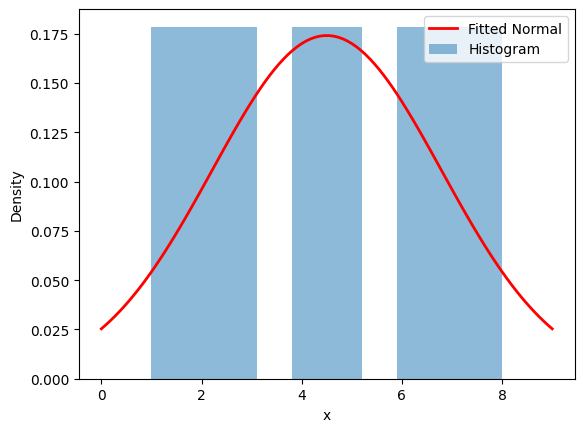

In [47]:
hist, bin_edges = np.histogram(x, bins=10, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
x_grid = np.linspace(min(x)-1, max(x)+1, 100)
pdf = norm.pdf(x_grid, loc=mu, scale=sigma)
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.5, label='Histogram', align='center')
plt.plot(x_grid, pdf, 'r-', lw=2, label='Fitted Normal')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

## Question 3

Assume the data are i.i.d. **Exponential($\lambda$)** with **unknown** rate $\lambda$.

**(c)** Compute $\hat{\lambda}$.  


In [ ]:
expon_lambda = 1/np.mean(x)
print(expon_lambda)

**(a)** Compute the MLE for $\lambda$.  


In [34]:
expon_lambda = 1/np.mean(x)
print(expon_lambda)

0.4184100418410042


**(b)** Plot a histogram of the data with the **fitted Exponential** density overlaid.

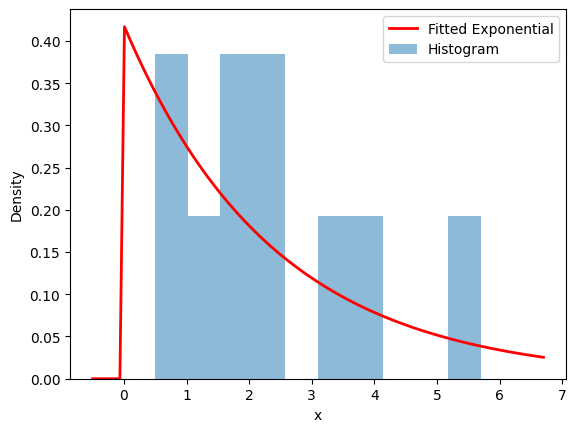

In [35]:
hist, bin_edges = np.histogram(x, bins=10, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
x_grid = np.linspace(min(x)-1, max(x)+1, 100)
pdf = expon.pdf(x_grid, scale=1/expon_lambda)
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.5, label='Histogram')
plt.plot(x_grid, pdf, 'r-', lw=2, label='Fitted Exponential')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

## Question 4 — Model Comparison (Visual + AIC)



**(a)** Visually compare your overlaid fits from Q2 and Q3. Which model seems better?  

Based off of the histograms for both problems, I would say that the normal model fits better than the exponential.

**(b)** Compute **AIC** for both models using the log-likelihoods at the MLEs:
$$
\mathrm{AIC} = -2\,\ell(\hat{\theta}) + 2k,
$$
where $k$ is the number of parameters (Normal: $k=2$ for $\mu,\sigma$; Exponential: $k=1$).  

In [36]:
aic_norm = -2 * log_likelihood_norm + 2 * 2
print(aic_norm)

aic_exp = -2 * log_likelihood_exp + 2 * 1
print(aic_exp)

47.12877066409345
39.76294361119891


**(c)** Which model is preferred by AIC? Briefly justify.

Based off of AIC, the exponential model is preferred. With AIC, a lower score indicates a better model. It balances fit and complexity, helping prevent overfitting. So, with the exponential function having a lower AIC score, it is the preferred model.

## Question 5 — Regression under Different Losses

Consider the regression dataset (note the last point is a potential outlier):
\[
x_reg = (1,2,3,4,5,6,7,8),\quad
y_reg = (2.1, 3.9, 6.0, 8.2, 9.8, 12.1, 14.2, 30.0).
\]

We fit $y = \beta_0 + \beta_1 x$ under three losses.



**(a)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming a squared error loss function.


In [38]:
def loss_sq(params):
    b0, b1 = params
    r = y - (b0 + b1*x)
    return np.sum(r**2)
res_Lsq = minimize(loss_sq, [0, 0])
b0_sq, b1_sq = res_Lsq.x
print(b0_sq)
print(b1_sq)

-3.4999999800084862
3.174999989978283


**(b)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming an absolute loss function.


In [39]:
def loss_abs(params):
    b0, b1 = params
    r = y - (b0 + b1*x)
    return np.sum(np.abs(r))
res_abs = minimize(loss_abs, [0, 0])
res_abs.x
b0_abs, b1_abs = res_abs.x
print(b0_abs)
print(b1_abs)

-0.1499379283310926
2.0499793082195286


**(c)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming a loss function that is equal to the largest difference $y - \hat{y}$


In [40]:
def loss_equals(params):
    b0, b1 = params
    r = y - (b0 + b1*x)
    return np.max(np.abs(r))
res_equals = minimize(loss_equals, [0, 0])
res_equals.x
b0_equals, b1_equals = res_equals.x
print(b0_equals)
print(b1_equals)

0.3031837218287903
2.9062421696215424


**(d)** Plot the data with **all three** fitted lines on the same axes.  


Square fit: y = -3.500 + 3.175 x
Absolute fit: y = -0.150 + 2.050 x
Equals fit: y = 0.303 + 2.906 x


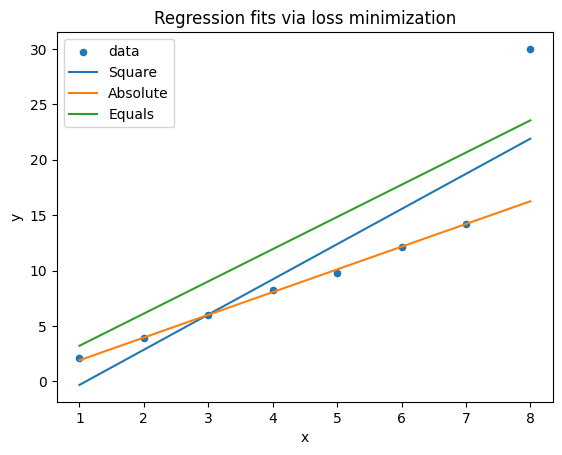

In [41]:
print(f"Square fit: y = {b0_sq:.3f} + {b1_sq:.3f} x")
print(f"Absolute fit: y = {b0_abs:.3f} + {b1_abs:.3f} x")
print(f"Equals fit: y = {b0_equals:.3f} + {b1_equals:.3f} x")

plt.figure()
plt.scatter(x, y, s=20, label="data")
xx = np.array([x.min(), x.max()])
plt.plot(xx, b0_sq + b1_sq*xx, label="Square")
plt.plot(xx, b0_abs + b1_abs*xx, label="Absolute")
plt.plot(xx, b0_equals + b1_equals*xx, label="Equals")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Regression fits via loss minimization")
plt.legend();
plt.show()